# Численное решение уравнения Блэка-Шоулза для европейского call-опциона

In [2]:
import numpy as np

## Параметры модели

In [3]:
#Цена акции в момент t = 0
#S = 42

#Цена исполнения -  страйк
K = 250

#безрисковая процентная ставка
r = 0.10

#волатильность
sg = 0.4

#Период
T = 0.25

#Параметр Smax
S_max = 3 * K

## Граничные условия

In [4]:
def l_cond(t):
    return 0

def r_cond(t):
    return S_max - K * np.exp(-r * (T - t)) 

## Начальное условие (t = T)

In [5]:
def init_cond(x):
    return max(0, x - K)

## Численное решение

### Параметры

In [24]:
#параметры сетки
n = 100
m = 1000

h = S_max / n
tau = T / m

### Условие устойчивости

In [25]:
alpha_1 = 1 - sg**2 * tau * S_max**2 / h**2
alpha_2 = r * tau * S_max / (2 * h)

if ((1 - alpha_1) >= 0 and (alpha_2 + alpha_1 / 2) >= 0 and (alpha_1 / 2 - alpha_2) >= 0):
    print("OK")
else: 
    print("Wrong condition")

OK


### Итерации

In [26]:
#значения s_i
s_vals = []

#списки коэффициентов
a = [] #i-1
b = [] #i
c = [] #i+1

#значения на текущем и предыдущем слоях
v_prev = []
v_curr = []

#функция для вычисления значений на слое
def calc_layer(v_prev, a, b, c, layer):    
    vals = np.zeros(len(v_prev))
    for i in range(1, len(v_prev) - 1):
        vals[i] = a[i] * v_prev[i-1] + b[i] * v_prev[i] + c[i] * v_prev[i+1]
    vals[-1] = r_cond(T - layer * tau)
    return vals

#начальное заполнение
for s_i in np.arange(0, S_max + 1, h):
    
    s_vals.append(s_i)
    
    #значения цены
    v_prev.append(init_cond(s_i))
    
    #коэффициенты - зависят только от s_i и параметров модели (констант)
    a.append(sg**2 * tau * s_i**2 / (2 * h**2) - r * tau * s_i / (2 * h))
    b.append(1 - r*tau - sg**2 * tau * s_i**2 / h**2)
    c.append(sg**2 * tau * s_i**2 / (2 * h**2) + r * tau * s_i / (2 * h))

    
for layer in range(1, m):
    v_curr = calc_layer(v_prev, a, b, c, layer)
    v_prev = v_curr
    
#вывод
print("layer: ", layer)
for i in range(len(s_vals)): 
    print(s_vals[i], " {", i, "}: ", v_curr[i])

layer:  999
0.0  { 0 }:  0.0
7.5  { 1 }:  4.6982178573449353e-23
15.0  { 2 }:  3.6331778614255035e-20
22.5  { 3 }:  8.292689569208227e-18
30.0  { 4 }:  8.720198106714466e-16
37.5  { 5 }:  5.149688448403108e-14
45.0  { 6 }:  1.9138965902780427e-12
52.5  { 7 }:  4.8243218581275917e-11
60.0  { 8 }:  8.701630667648999e-10
67.5  { 9 }:  1.1698711410099508e-08
75.0  { 10 }:  1.2112204410591492e-07
82.5  { 11 }:  9.922937592131496e-07
90.0  { 12 }:  6.5841184844955565e-06
97.5  { 13 }:  3.6114517495851225e-05
105.0  { 14 }:  0.00016678173915330905
112.5  { 15 }:  0.0006593382500785
120.0  { 16 }:  0.0022653911788254708
127.5  { 17 }:  0.00685929066347508
135.0  { 18 }:  0.018536674115215326
142.5  { 19 }:  0.045231176313825484
150.0  { 20 }:  0.10071203754453104
157.5  { 21 }:  0.20659423069449134
165.0  { 22 }:  0.3938239362132863
172.5  { 23 }:  0.703092878863965
180.0  { 24 }:  1.1838166627760554
187.5  { 25 }:  1.8916310551383602
195.0  { 26 }:  2.8847060808558194
202.5  { 27 }:  4.219438

In [27]:
map_of_vals = dict(zip(s_vals, v_curr))
map_of_vals[300]

60.35737157603629

## График

In [10]:
import matplotlib.pyplot as plt

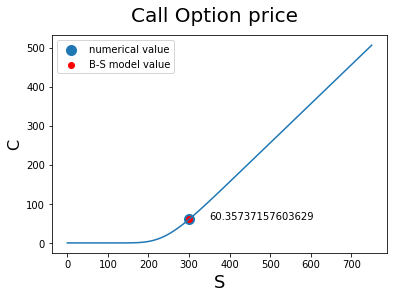

In [43]:
fig = plt.figure()
plt.plot(s_vals, v_curr)
fig.suptitle('Call Option price', fontsize=20)
plt.xlabel('S', fontsize=18)
plt.ylabel('C', fontsize=16)
plt.scatter(300, map_of_vals[300], s = 100, label = 'numerical value')
plt.scatter(300, c, color='r', label = 'B-S model value')
plt.text(350, map_of_vals[300], map_of_vals[300])
plt.legend()

## Погрешность вычислений

In [30]:
#Black-Scholes Model

def NSR(xn):
    eps = 0.00000000001
    xn = xn / np.sqrt(2.0)
    mlt = 1.0
    sum1 = xn
    n = 0
    
    while True:
        n = n + 1
        mlt = mlt * (-xn * xn / n)
        pt = (xn / (2 * n + 1)) * mlt
        sum1 = sum1 + pt
        if (np.abs(pt) < eps):
            #print((0.5 * (1 + sum1)))
            break
    sum1 = 2.0 / (np.sqrt(np.pi)) * sum1
    return (0.5 * (1 + sum1))

In [31]:
#Call

S = 300

d1 = (np.log(S / K) + (r + sg*sg / 2.0)*T) / (sg * np.sqrt(T))
d2 = d1 - sg*np.sqrt(T)
c = S * NSR(d1) - K*np.exp(-r*T)*NSR(d2)
c

60.36023991360105

In [32]:
err = abs(c - map_of_vals[300])
err

0.0028683375647560183